# Demonstration of the ebisim package

In [1]:
# Import what we need
import numpy as np
from matplotlib import pyplot as plt
import ebisim
ebisim.plotting.COLORMAP = lambda x: plt.cm.inferno(0.85*x)

In [2]:
# Uncomment to see all members of the ebisim package
# ebisim.__dict__

Define which element we want to look at and what the FWHM of the electron beam energy should be

In [3]:
ELEMENT = "K"
FWHM = 10

Now we create the object describing the element and its cross sections for the simulation

We can also print some properties to see if the object was created correctly

In [5]:
species = ebisim.EBISSpecies(ELEMENT)
print(species)

EBISSpecies - Element: Potassium (K, Z = 19)


## Cross Sections

Now we can take a look at the different cross sections
This can be done per cross section type or for all cross sections combined

### Electron impact ionisation cross section

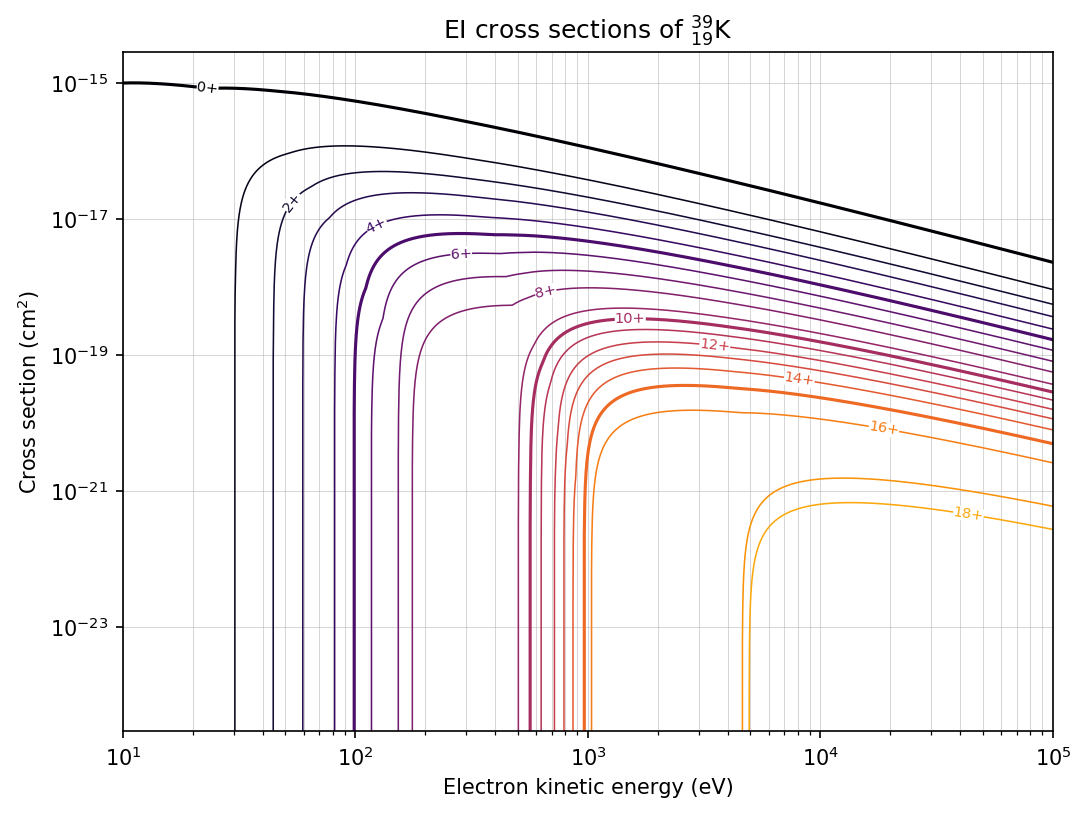

In [6]:
_ = ebisim.plot_ei_xs("K")
plt.show()

### Radiative recombination cross section

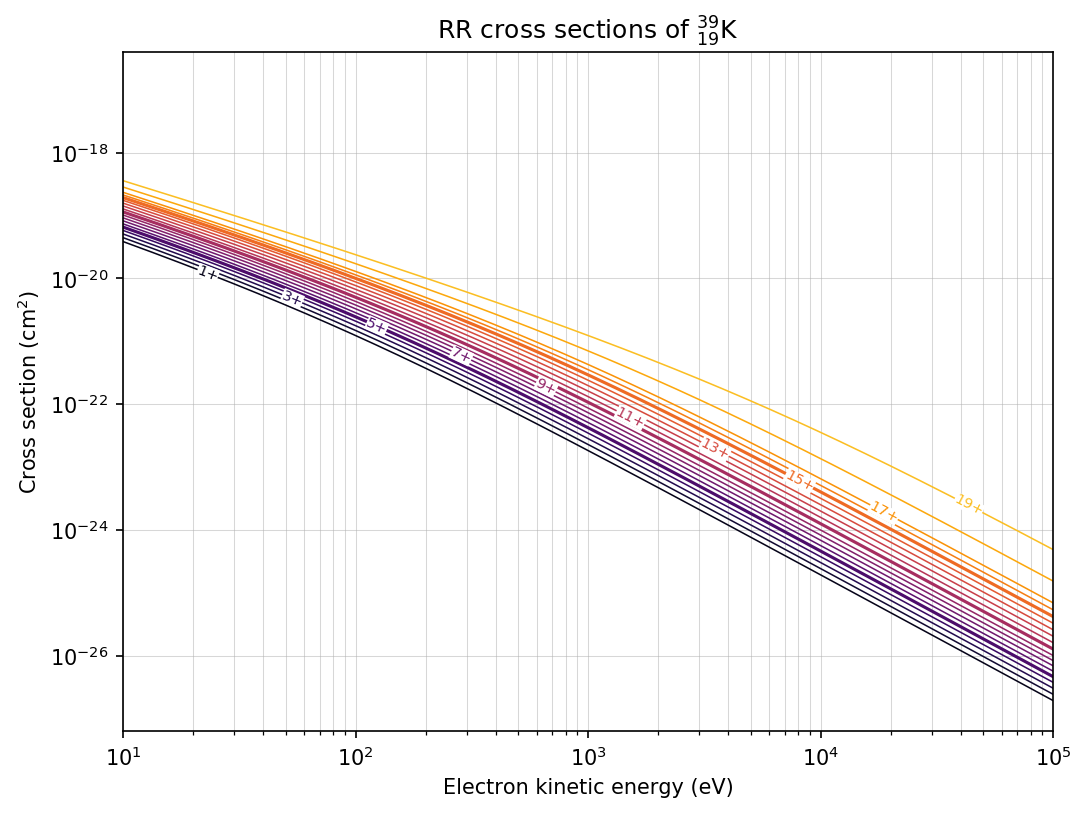

In [7]:
_ = ebisim.plot_rr_xs("K")
plt.show()

### Di(multi)electronic recombination cross section

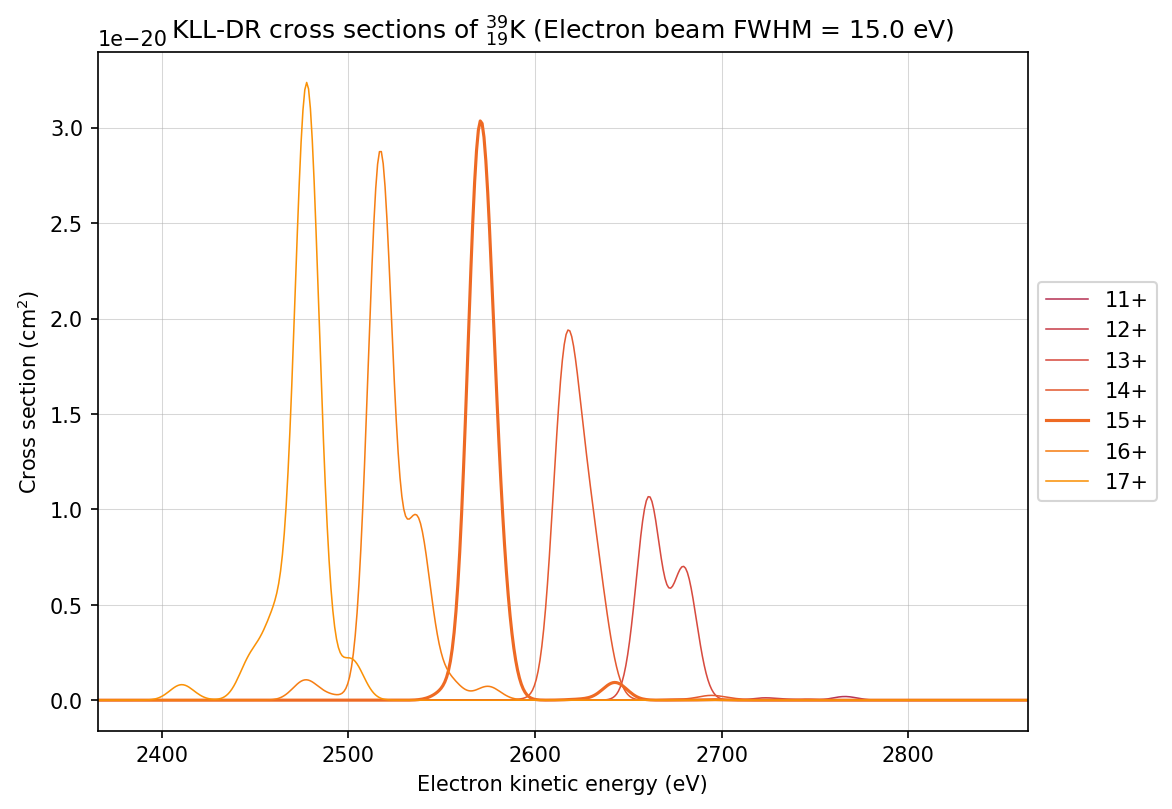

In [8]:
_ = ebisim.plot_dr_xs("K", 15)
_.gca().set_title("KLL-"+_.gca().get_title())
plt.show()

### Combined Cross Section

Lets only look at the range of the DR transitions here

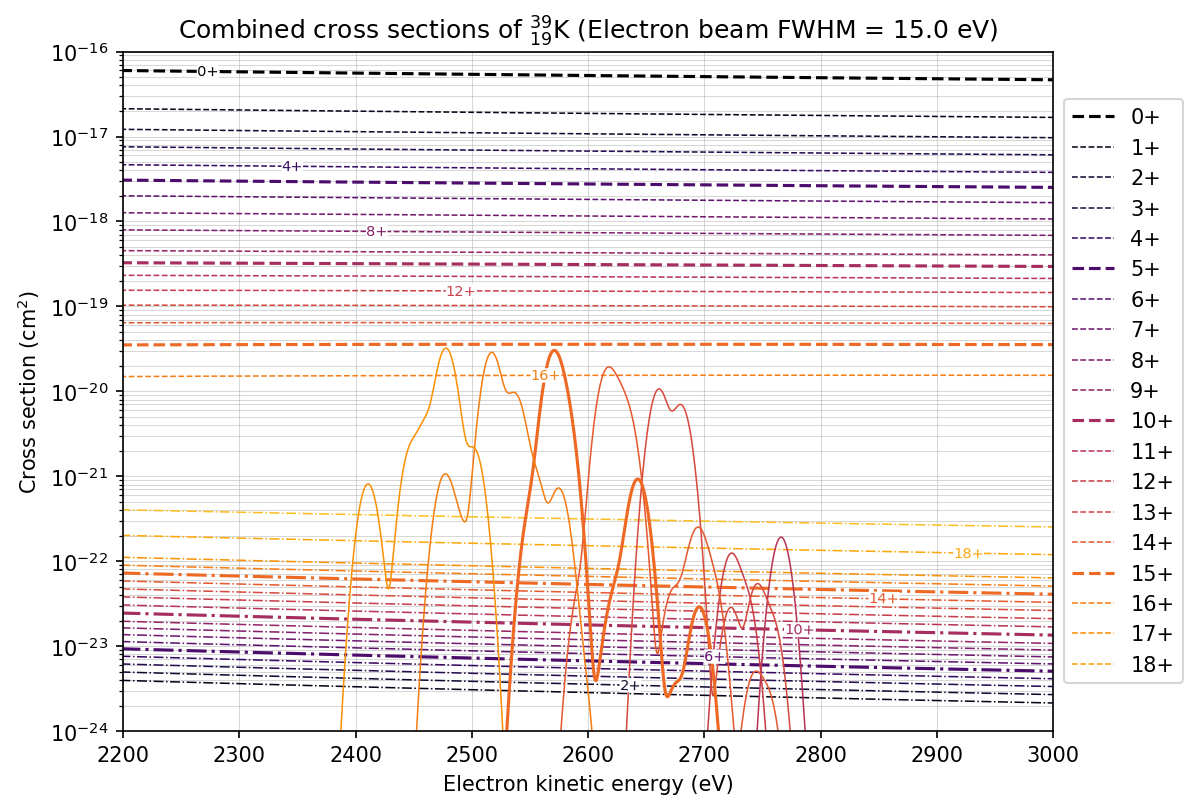

In [9]:
# species.plot_combined_xs(xlim=(2000, 3000), ylim=(1e-24, 1e-16))
_ = ebisim.plot_combined_xs("K", 15, xlim=(2200, 3000))
plt.show()

## Simulating the Charge Breeding

Lets first set some parameters we want to use

In [4]:
J = 50 # We need to provide the current density in A/cm^2, this is a typical value for REXEBIS
E_KIN = 3000 # We need to provide the mean electron kinetic energy in eV

### Simple EBIS Problem
This problem type can be used to solve the conventional rate equations to predict the charge state evolution

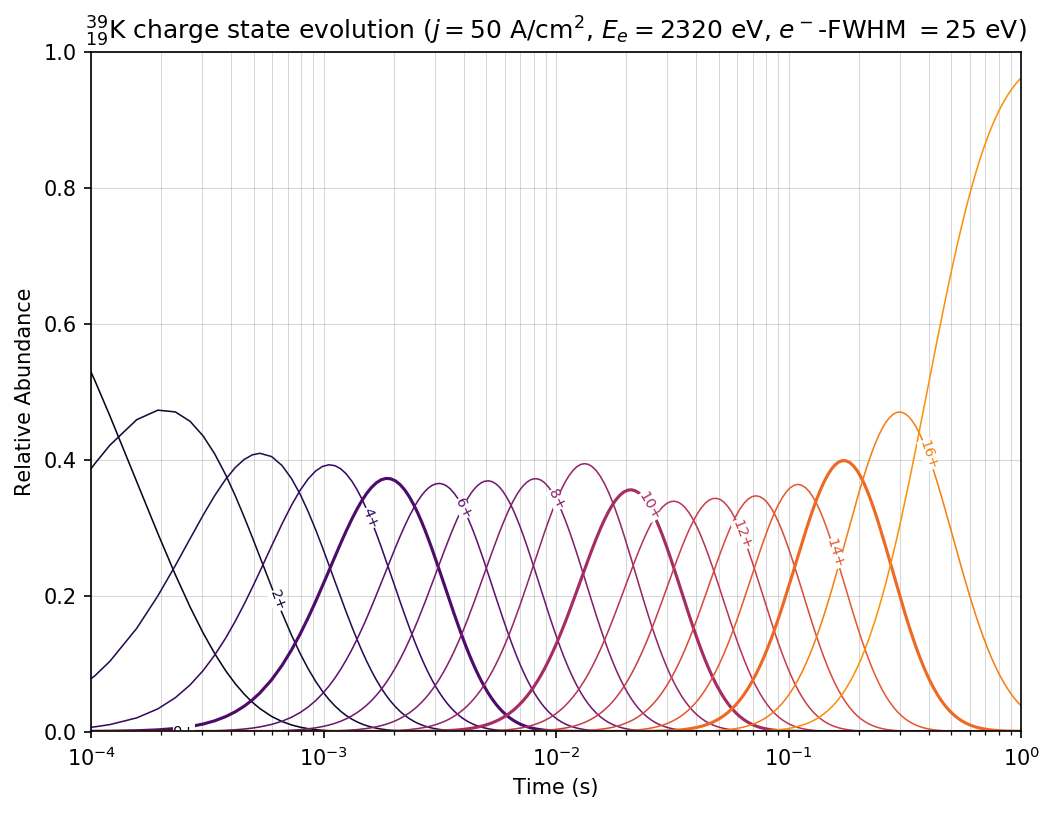

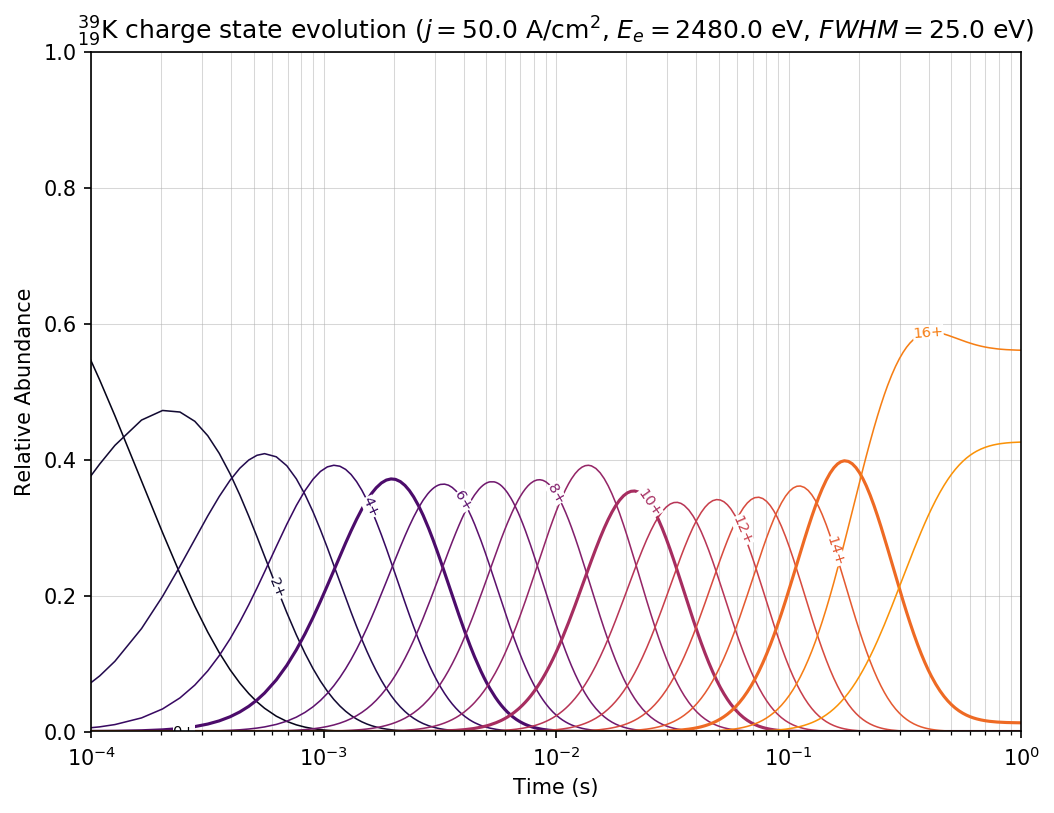

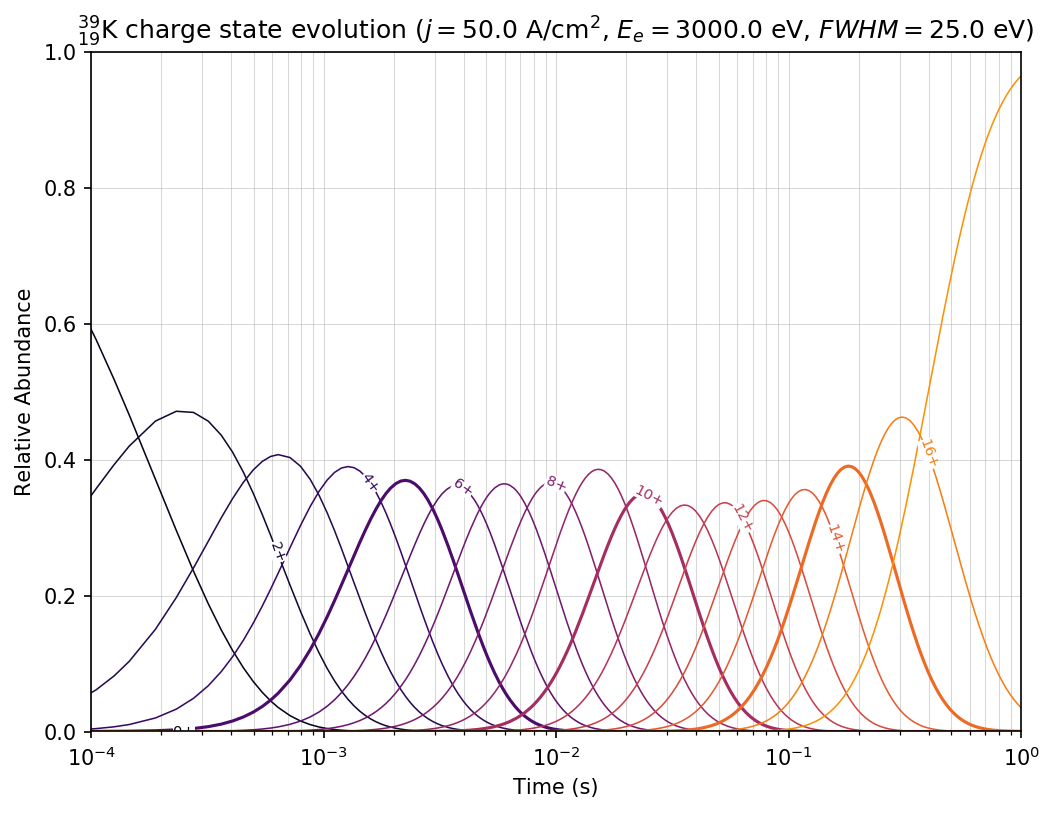

In [17]:
ELEMENT = "K"
ebisim.plotting.COLORMAP = lambda x: plt.cm.inferno(0.85*x)
simple_problem = ebisim.SimpleEBISProblem(ELEMENT, J, 2320, 25) 
simple_sol = simple_problem.solve(max_time=1)
fig = simple_problem.plot_solution()
fig.gca().set_title("$^{39}_{19}$K charge state evolution ($j = 50$ A/cm$^2$, $E_{e} = 2320$ eV, $e^-$-FWHM $= 25$ eV)")
# fig.set_figheight(5)
# fig.set_figwidth(6)
simple_problem = ebisim.SimpleEBISProblem(ELEMENT, J, 2480, 25) 
simple_sol = simple_problem.solve(max_time=1)
fig = simple_problem.plot_solution()
# fig.set_figheight(5)
# fig.set_figwidth(6)
plt.show()
simple_problem = ebisim.SimpleEBISProblem(ELEMENT, J, E_KIN, 25) 
simple_sol = simple_problem.solve(max_time=1)
fig = simple_problem.plot_solution()
# fig.set_figheight(5)
# fig.set_figwidth(6)
plt.show()

### Continuous Neutral Injection EBIS Problem
This problem type can be used to solve the conventional rate equations to predict the charge state evolution for the case where there is a continuous injection of neutral particles

In [24]:
ci_problem = ebisim.problems.ComplexEBISProblem(ELEMENT, J, 2300, FWHM) 
ci_sol = ci_problem.solve(max_time=5)
fig = ci_problem.plot_cs_evo()
fig.gca().set_xlim=(1e-3, 5)
ci_problem = ebisim.problems.ComplexEBISProblem(ELEMENT, J, 2800, FWHM) 
ci_sol = ci_problem.solve(max_time=5)
fig = ci_problem.plot_cs_evo()
fig.gca().set_xlim=(1e-3, 5)
plt.show()

Z:\hapahl\PhD\GitHubRepos\EBISSimulation\ebisim\problems.py:379: RuntimeWarning: overflow encountered in true_divide
  R_cx = N * self._bg_N0 * np.sqrt(8 * Q_E * np.clip(kbT, 0, None)/(PI * A * M_P)) * sigcx
Z:\hapahl\PhD\GitHubRepos\EBISSimulation\ebisim\problems.py:379: RuntimeWarning: invalid value encountered in multiply
  R_cx = N * self._bg_N0 * np.sqrt(8 * Q_E * np.clip(kbT, 0, None)/(PI * A * M_P)) * sigcx
C:\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:335: RuntimeWarning: invalid value encountered in maximum
  scale_new = np.maximum(np.abs(f[max_ind]), np.abs(f_new[max_ind, r]))
C:\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:337: RuntimeWarning: invalid value encountered in less
  update = max_diff[ind] * scale_new < max_diff_new * scale[ind]
C:\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:322: RuntimeWarning: invalid value encountered in maximum
  scale = np.maximum(np.abs(f[max_ind]), np.abs(f_new[max_ind, r]))
C:\Anaconda3\lib\sit

ValueError: array must not contain infs or NaNs

### Energy Scan

We can also investigate how the charge breeding changes when we scan the electorn beam energy
This is particularly useful for investigating the effect of DR resonances
For the scan we need to include a few more parameters

In [5]:
PROBLEMTYPE = ebisim.problems.ComplexEBISProblem # could also be ebisim.ContinuousNeutralInjectionEBISProblem
ENERGIES = np.arange(2400, 2701) # These energies should be sampled
EVAL_TIMES = np.array([50, 100, 150, 200, 300, 400])/1000 # At these times we want to save the results
EVAL_TIMES = np.logspace(-2,1,100) # At these times we want to save the results

In [6]:
scan = ebisim.EnergyScan(PROBLEMTYPE, ELEMENT, 20, 25, ENERGIES, EVAL_TIMES)
scan_sol = scan.solve(method="BDF") # Time consuming -> Hundreds of simulations

Progress:  100.0%

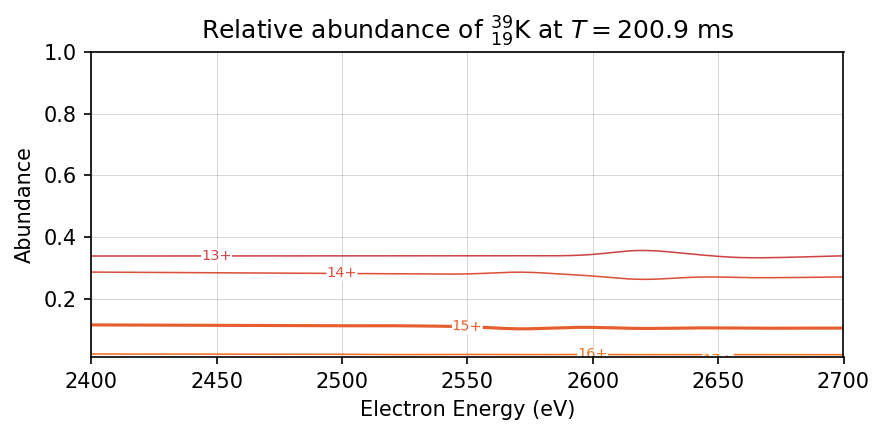

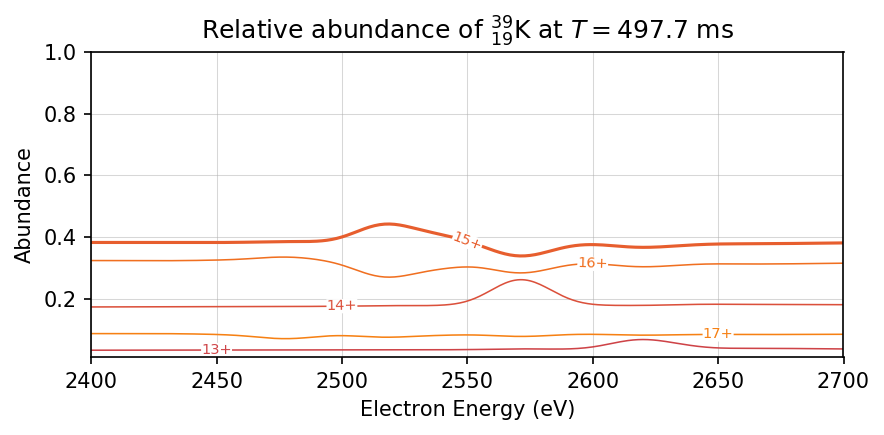

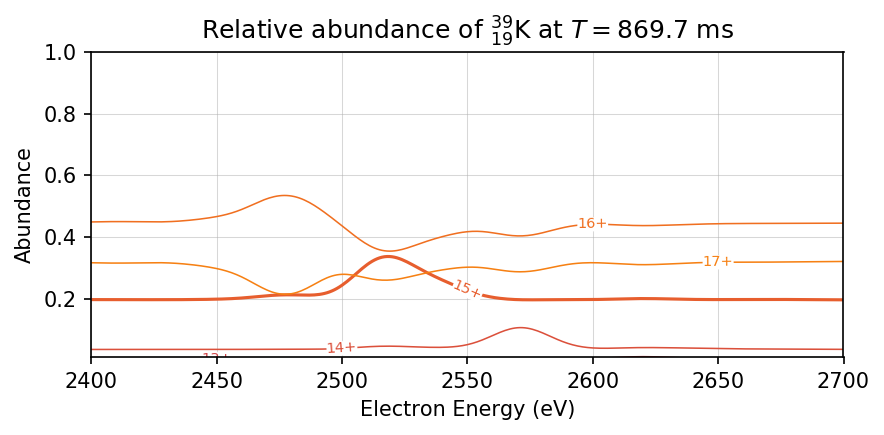

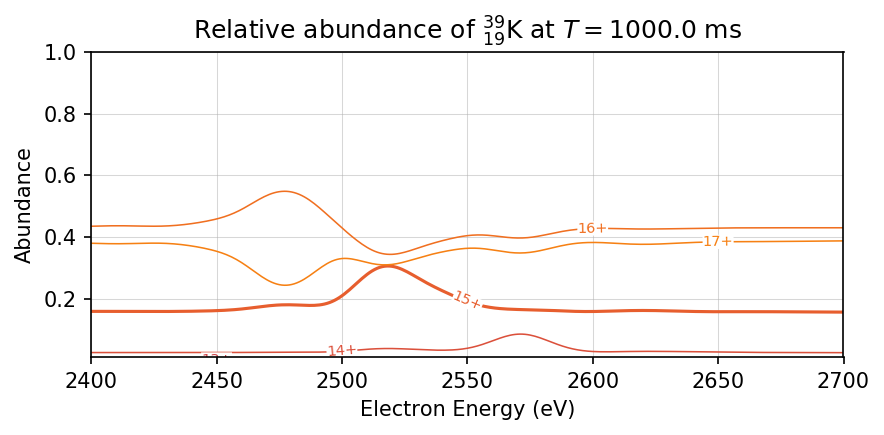

In [7]:
CS = [13, 14, 15, 16, 17] #These are the charge states we want to plot
plt.close("all")
for t in [.2,.5,.9,1]:
    fig = scan.plot_abundance_at_time(t, CS)
#     plt.ylim(0, 1e16)
plt.show()

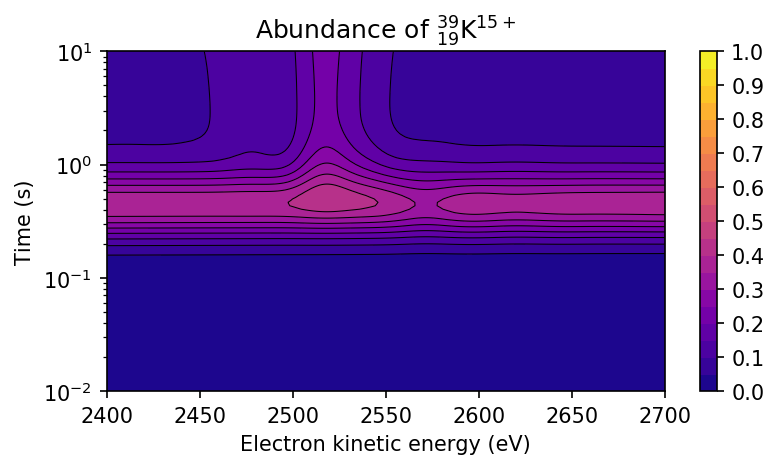

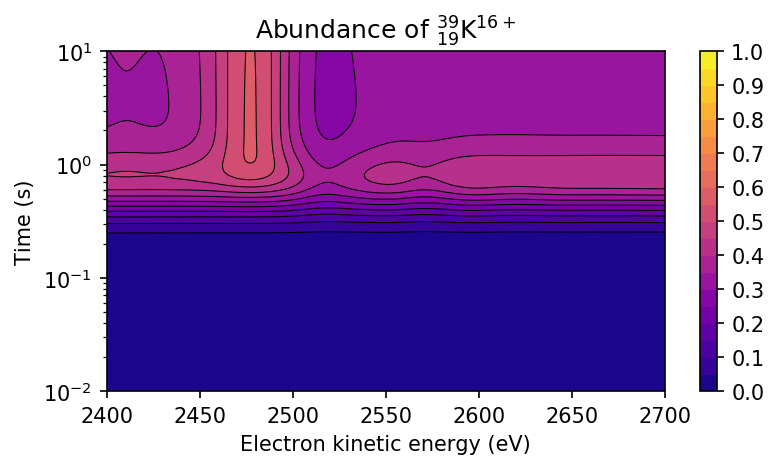

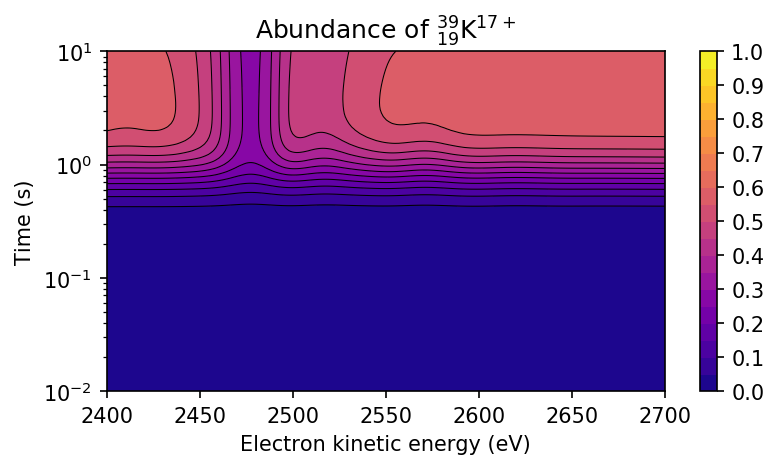

In [21]:
scan.plot_abundance_of_cs(15)
scan.plot_abundance_of_cs(16)
scan.plot_abundance_of_cs(17)
plt.show()